In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


In [2]:
#cons_data = pd.read_csv('Household consumption.csv',sep=';',header=None) #data from https://www.insee.fr/fr/statistiques/6522959

In [44]:
data = pd.read_excel('./data/Classification_perso.xlsx',sheet_name ='HH_CONS_EXP')

In [4]:
fce_data = data[[data.columns[1]]+[data.columns[10]]]

In [5]:
fce_data.columns = ['date','yoy_fce_growth']

In [6]:
fce_data = fce_data[4:34]

In [7]:
def date_form(s):
    if s[1]=='1':
        return '01-'+s[-4:]
    elif s[1]=='2':
        return '04-'+s[-4:]
    elif s[1]=='3':
        return '07-'+s[-4:]
    else:
        return '10-'+s[-4:]

In [8]:
fce_data['date'] = fce_data['date'].apply(date_form)

In [9]:
fce_data

,date,yoy_fce_growth
4,01-2016,1.695315
5,04-2016,0.948301
6,07-2016,0.390689
7,10-2016,1.546101
8,01-2017,0.779924
9,04-2017,1.599056
10,07-2017,2.428619
11,10-2017,1.612851
12,01-2018,1.557589
13,04-2018,0.825719


In [10]:
fce_data.index = fce_data['date']

In [11]:
del fce_data['date']

In [12]:
#cons_data.index = cons_data[0]

In [13]:
#del cons_data[0]

In [14]:
#cons_data.columns=['consumption']

<AxesSubplot:xlabel='date'>

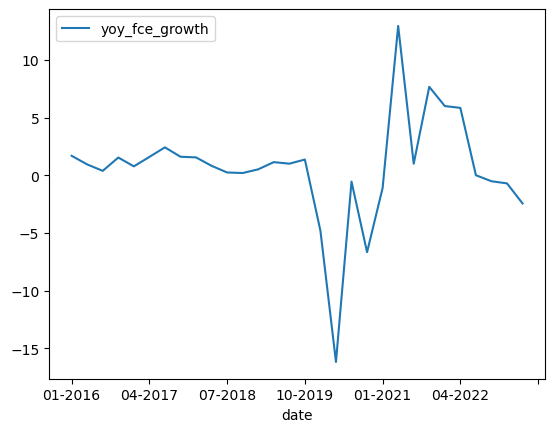

In [15]:
fce_data.plot()

<AxesSubplot:xlabel='0'>

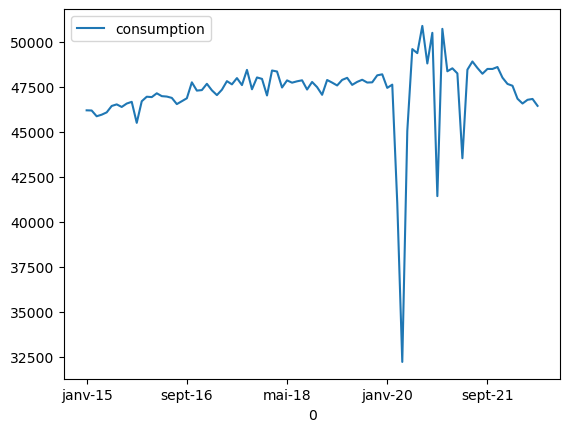

In [16]:
#cons_data.plot()

In [17]:
#cycle,trend = sm.tsa.filters.hpfilter(cons_data, lamb=129600)

In [18]:
cycle_fce,trend_fce = sm.tsa.filters.hpfilter(fce_data, lamb=1600)

<AxesSubplot:xlabel='0'>

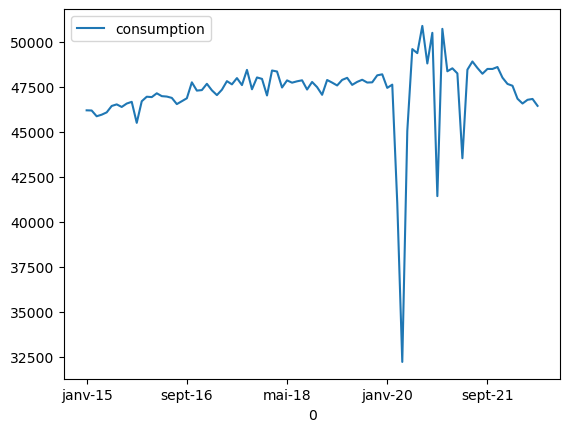

In [19]:
#cons_data.plot()

<AxesSubplot:xlabel='0'>

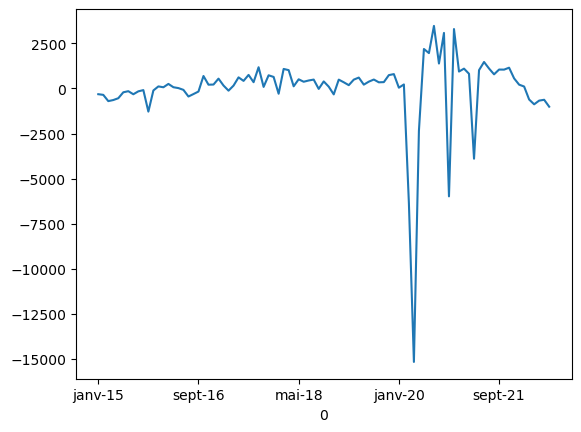

In [20]:
#cycle.plot()

<AxesSubplot:xlabel='date'>

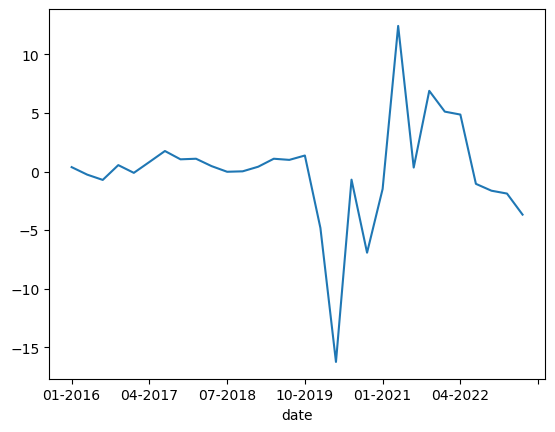

In [21]:
cycle_fce.plot()

<AxesSubplot:xlabel='date'>

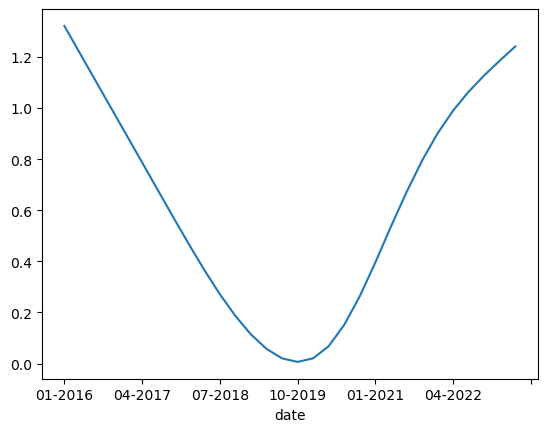

In [22]:
trend_fce.plot()

<AxesSubplot:xlabel='0'>

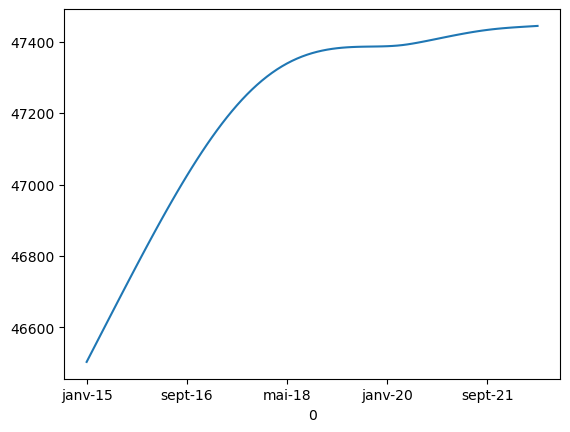

In [23]:
#trend.plot()

<AxesSubplot:xlabel='0'>

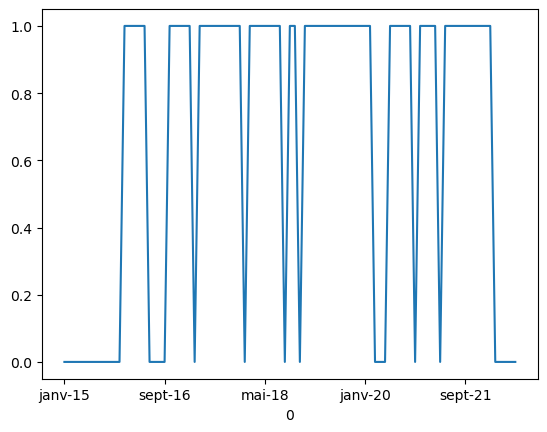

In [24]:
#cycle.apply(lambda x: int(x>0)).plot()

In [25]:
#df = pd.DataFrame(data=[cycle,trend,cons_data['consumption']]).T

In [26]:
dfce = pd.DataFrame(data=[cycle_fce,trend_fce,fce_data['yoy_fce_growth']]).T

In [27]:
dfce

,cycle,trend,yoy_fce_growth
date,,,
01-2016,0.373665,1.321651,1.695315
04-2016,-0.266137,1.214438,0.948301
07-2016,-0.716770,1.107459,0.390689
10-2016,0.545320,1.000781,1.546101
01-2017,-0.114099,0.894022,0.779924
04-2017,0.811912,0.787144,1.599056
07-2017,1.748584,0.680035,2.428619
10-2017,1.039761,0.573090,1.612851
01-2018,1.089790,0.467799,1.557589


In [28]:
#months = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']

def format_date(s):
    month = months.index(s[:-3])+1
    if month<10:
        return '0'+str(month)+'-'+'20'+s[-2:]
    else: 
        return str(month)+'-'+'20'+ s[-2:]

In [30]:
#df['date'] = df.index

In [31]:
dfce['date'] = dfce.index

In [32]:
#df['date'] = df['date'].apply(format_date)

In [33]:
#df.index = df['date']

In [34]:
#df

,cycle,trend,consumption,date
date,,,,
01-2015,-318.082123,46503.082123,46185.0,01-2015
02-2015,-354.296464,46530.296464,46176.0,02-2015
03-2015,-701.508351,46557.508351,45856.0,03-2015
04-2015,-641.712595,46584.712595,45943.0,04-2015
05-2015,-540.898596,46611.898596,46071.0,05-2015
...,...,...,...,...
03-2022,-612.730619,47440.730619,46828.0,03-2022
04-2022,-878.628605,47441.628605,46563.0,04-2022
05-2022,-673.488307,47442.488307,46769.0,05-2022


In [35]:
#df.index = pd.to_datetime(df.index, format='%m-%Y')

In [36]:
dfce.index = pd.to_datetime(dfce.index, format='%m-%Y')

In [37]:
#df

,cycle,trend,consumption,date
date,,,,
2015-01-01,-318.082123,46503.082123,46185.0,01-2015
2015-02-01,-354.296464,46530.296464,46176.0,02-2015
2015-03-01,-701.508351,46557.508351,45856.0,03-2015
2015-04-01,-641.712595,46584.712595,45943.0,04-2015
2015-05-01,-540.898596,46611.898596,46071.0,05-2015
...,...,...,...,...
2022-03-01,-612.730619,47440.730619,46828.0,03-2022
2022-04-01,-878.628605,47441.628605,46563.0,04-2022
2022-05-01,-673.488307,47442.488307,46769.0,05-2022


plt.plot(df.index, df['consumption'], label='Value', color='blue')
plt.plot(df.index,df['trend'],label='Trend',color='black')
plt.fill_between(df.index, df['trend'], df['consumption'], where=(df['cycle'] < 0),
                 interpolate=True, color='red', alpha=0.3, label='Below trend')
plt.fill_between(df.index, df['trend'], df['consumption'], where=(df['cycle'] >= 0),
                 interpolate=True, color='green', alpha=0.3, label='Above Trend')

date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.xlim(df.index.min(), df.index.max())

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Cycle and Trend Plot')
plt.gcf().autofmt_xdate(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

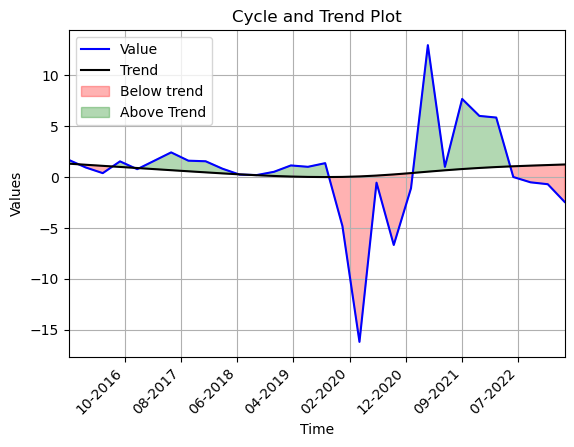

In [39]:
plt.plot(dfce.index, dfce['yoy_fce_growth'], label='Value', color='blue')
plt.plot(dfce.index,dfce['trend'],label='Trend',color='black')
plt.fill_between(dfce.index, dfce['trend'], dfce['yoy_fce_growth'], where=(dfce['cycle'] < 0),
                 interpolate=True, color='red', alpha=0.3, label='Below trend')
plt.fill_between(dfce.index, dfce['trend'], dfce['yoy_fce_growth'], where=(dfce['cycle'] >= 0),
                 interpolate=True, color='green', alpha=0.3, label='Above Trend')

date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.xlim(dfce.index.min(), dfce.index.max())

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Cycle and Trend Plot')
plt.gcf().autofmt_xdate(rotation=45)
plt.legend()
plt.grid(True)
plt.show()